In [1]:
from infrastructure.classes import Experiment, TrainParameters
from infrastructure.training import train
import torch

experiment = Experiment(
    tensor_parameters=dict(dtype=torch.float32, device=torch.device("cpu")),
    dataset_name="fnlvqr_star",
    dataset_number_of_points=10**4,
    dataloader_parameters=dict(batch_size=256, shuffle=True),
    pushforward_operator_name="convex_potential_flow",
    pushforward_operator_parameters=dict(
        feature_dimension=1,
        response_dimension=2,
        hidden_dimension=8,
        number_of_hidden_layers=4,
        n_blocks=4
    ),
    train_parameters=TrainParameters(
        number_of_epochs_to_train=100,
        verbose=True,
        optimizer_parameters=dict(lr=0.01),
        scheduler_parameters=dict(eta_min=0)
    )
)

model = train(experiment)
# _ = model.load("../experiments_22_08_2025/convex_banana_large_scale/convex_potential_flow/weights.pth")

Epoch: 100, Loss: -153.647, LR: 0.000000: 100%|██████████| 100/100 [05:47<00:00,  3.47s/it]


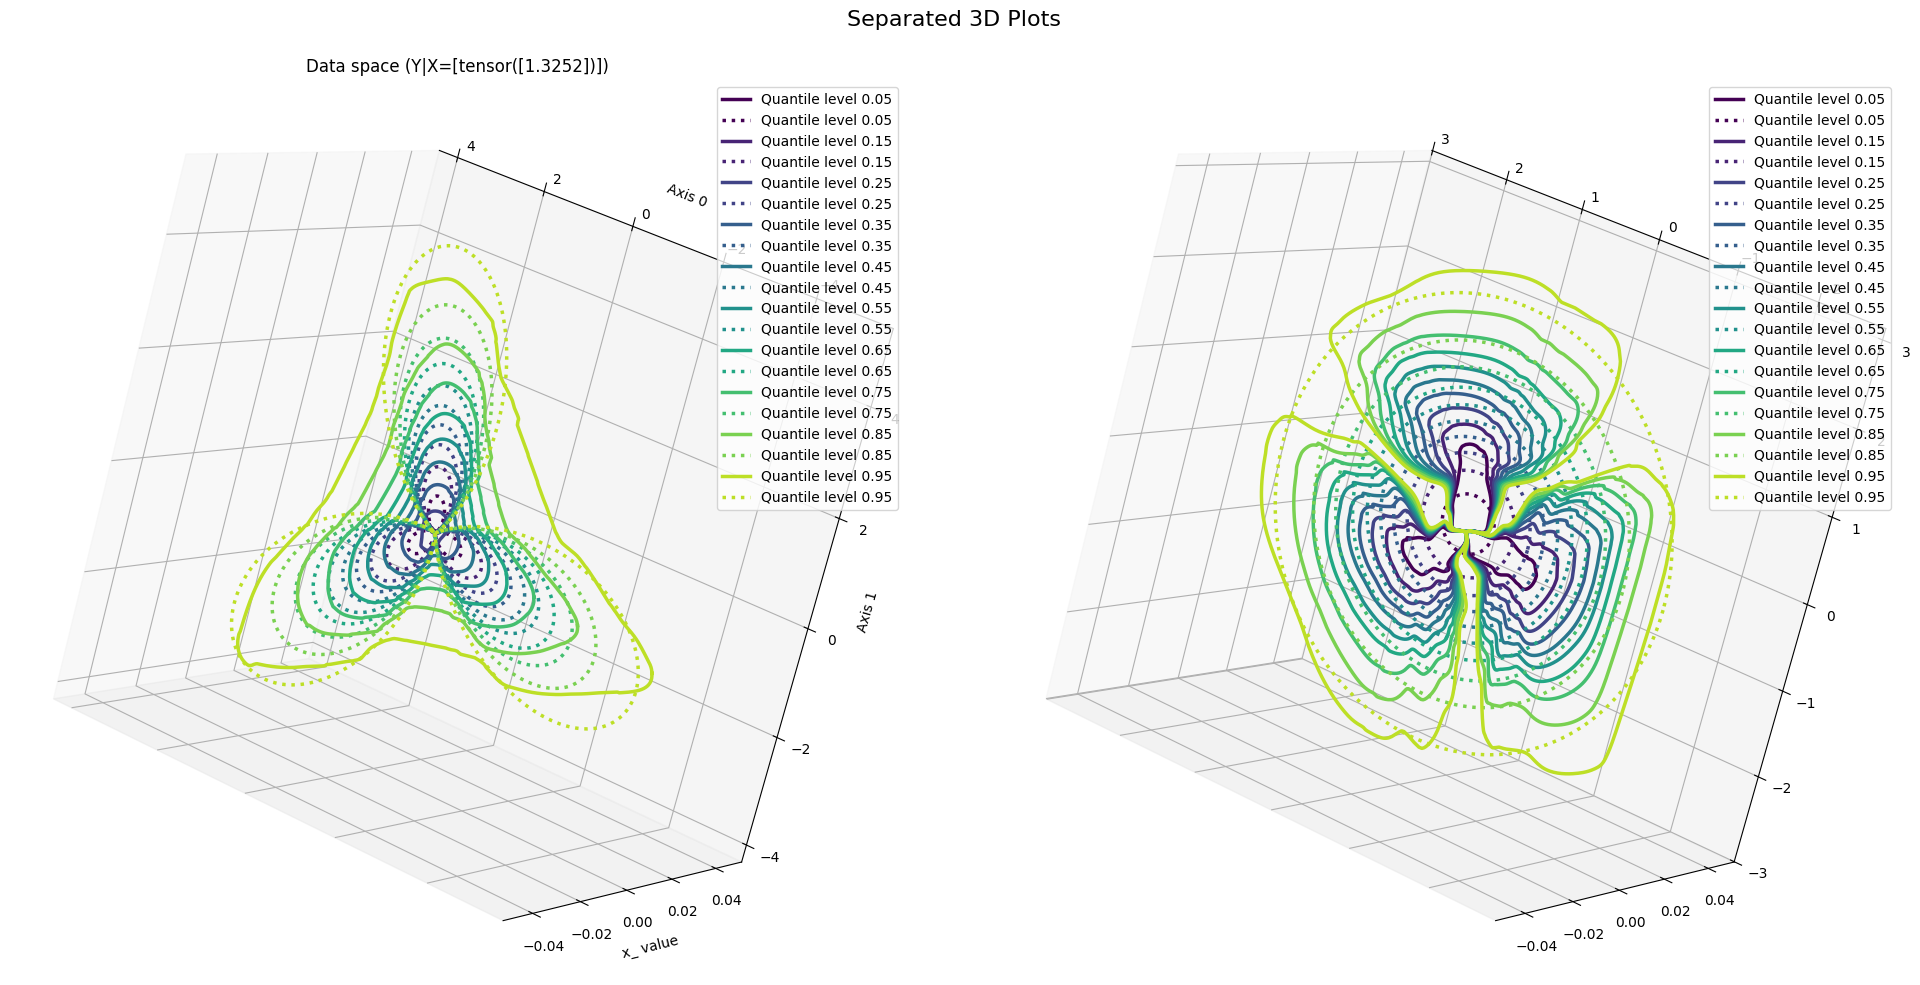

In [6]:
%matplotlib inline
from utils.plot import plot_quantile_levels_from_dataset
from datasets import FNLVQR_Star
dataset = FNLVQR_Star(tensor_parameters=experiment.tensor_parameters)

plot_quantile_levels_from_dataset(
    model=model,
    dataset=dataset,
    conditional_value=dataset.sample_covariates(1),
    number_of_quantile_levels=10,
    tensor_parameters=experiment.tensor_parameters
)